In [200]:
import numpy as np
import seaborn as sns

In [201]:
def get_matrix(h, f):
    return np.array(
        [
            [1.0, np.exp(-2*h*f), np.exp(-2*h)],
            [np.exp(-2*h*f), 1.0, np.exp(-2*h)],
            [np.exp(-2*h), np.exp(-2*h), 1.0],
        ]
    )

In [202]:
def get_distance(m_1, m_2):
    eigenvalues = np.linalg.eigvals(m_1.dot(np.linalg.inv(m_2))) 
    return np.sqrt(0.5*np.sum(np.square(np.log(eigenvalues))))

In [203]:
from geomstats.geometry.stratified.wald_space import (
    Wald,
    WaldSpace,
    WaldSpaceMetric,
    ForestTopology,
    Split,
    LocalProjectionSolver,
    SuccessiveProjectionGeodesicSolver,
)
from geomstats.learning.frechet_mean import FrechetMean
from functools import partial

In [204]:
space = WaldSpace(n_labels=3)
space.equip_with_metric(
    partial(
        WaldSpaceMetric,
        projection_solver=LocalProjectionSolver(space, 1e-16),
        geodesic_solver=SuccessiveProjectionGeodesicSolver(space, 100),
    )
)

In [205]:
get_distance(get_matrix(1.0, 0.5), get_matrix(1.0, 0.5))

np.complex128(2.3263298142106365e-16+0j)

In [206]:
def get_wald_point(h, f):
    return  Wald(
        ForestTopology(((0, 1, 2),), ((Split({0}, {1, 2}), Split({0, 1}, {2}), Split({0, 2}, {1})),)),
        np.array([1 - np.exp(-2*h*f), 1 - np.exp(-2*h), 1 - np.exp(-2*h*f)]),
    )

In [207]:
def get_wald_distance(p1, p2):
    return space.metric.dist(p1, p2)

In [208]:
get_wald_distance(get_wald_point(2.0, 0.8), get_wald_point(3.0, 0.8))

np.float64(0.0026804174097184497)

<Axes: >

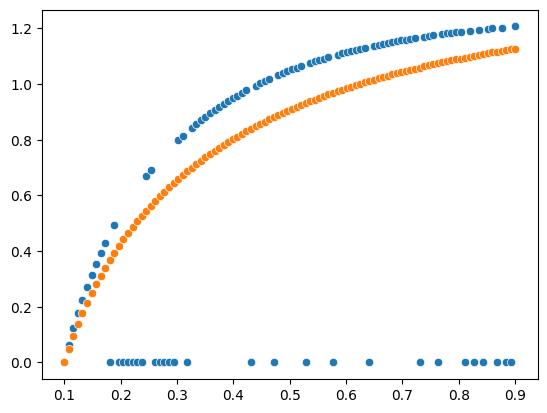

In [210]:
fractions = np.linspace(0.1, 0.9, 100)
distances = []
for f in fractions:
    try:
        distances.append(get_wald_distance(get_wald_point(1.0, f), get_wald_point(1.0, 0.1)))
    except:
        distances.append(0)

sns.scatterplot(x=fractions, y=distances)


fractions = np.linspace(0.1, 0.9, 100)
distances = [get_distance(get_matrix(1.0, f), get_matrix(1.0, 0.1)) for f in fractions]
sns.scatterplot(x=fractions, y=distances)